# PyRV32 - Instruction decoder


In [1]:
import sys
sys.path.append("../../../pyrv32")
sys.path.append("../")
sys.path.insert(0, "/home/pyosys/src/myhdl/myhdl-local")

## Instruction decoder

Defines the decode stage for the CPU:

In [2]:
from myhdl import *

@block
def decode(clk, insn, enable, event, mode, func, imm, reg, action):
    pc_imm = Signal(bv32())
    pc_func = Signal(modbv()[3:])
    pc_mode = Signal(t_mode.NOP)

    de_action = Action()

    inst_regno = regno_decode(insn, reg.d, reg.s1, reg.s2)
    inst_decoder = instruction_decode(insn, pc_mode, pc_func, pc_imm, de_action)

    @always(clk.posedge)
    def insn_decode():
        "Standard PyPS instruction decoder"
        if enable:
            mode.next = pc_mode
            func.next = pc_func
            imm.next = pc_imm
            action.swbrk.next = de_action.swbrk
            action.srcpc.next = de_action.srcpc
            action.aop.next = de_action.aop
            action.lmode.next = de_action.lmode
            action.immediate.next = de_action.immediate
            action.wreg.next = de_action.wreg


    return instances()


In [3]:
from riscv32i import *
from pyrv32_types import RegFileAddr, Dreg, bv32, Instruction
from pyrv32_exec import Action
from riscv32i import instruction_decode, regno_decode, t_mode
from core import fetch, decode, RegAddrPort

from myhdl.conversion import yshelper as ys

def convert(design):
    insn = Signal(Instruction())
    clk = Signal(bool(0))
    reset = ResetSignal(0, 1, False)
    event, de_en = [ Signal(bool(0)) for i in range(2) ]
    mode = Signal(t_mode.NOP)
    func = Signal(intbv(0)[3:0])
    imm = Signal(bv32())
    reg = RegAddrPort()
    action = Action()

    pc_imm = Signal(bv32())
    pc_func = Signal(intbv(0, min=0, max=64))
    pc_mode = Signal(t_mode.NOP)
    regd, regs1, regs2 = [ Signal(Dreg(0xffffffff)) for i in range(3) ]

    de_action = Action()
    
    inst_decode = decode(clk, insn, de_en, event, mode, func, imm, reg, action)

    inst_decode.convert("yosys_module", design, name="test", trace=True)

ys.DebugOutput.debug = False

design = ys.Design("exec")
convert(design)


Legacy class reg
Legacy class action
CREATE Module: 'test'
Legacy class reg
Legacy class action
Adding module with name: decode_1_32_1_1_5_3_32
CONVERT_RTL tree >>>>>> 'TEST_INSN_DECODE' 
++++++++  regno_decode_32_5_5_5  ++++++++
Legacy class action
++++++++  instruction_decode_32_5_3_32  ++++++++
Unused signal: concat_u
Unused signal: debug_op
unconnected (internal) wire imm31
unconnected (internal) wire imm_extend_21
unconnected (internal) wire immtype
Unused port: action_aop
Unused port: action_aop
Unused port: action_aop
Unused port: action_aop
Unused port: action_aop
Unused port: action_aop
Unused port: action_aop
Unused port: action_aop
Unused port: action_aop
Unused port: action_aop
DONE instancing submodules
CREATE Module: 'regno_decode_0'
Adding module with name: regno_decode_32_5_5_5
CONVERT_RTL tree >>>>>> 'TEST_REGNO_DECODE_0_WORKER' 
DONE instancing submodules
CREATE Module: 'instruction_decode_0'
Legacy class action
Adding module with name: instruction_decode_32_5_3_32
SI

Generating RTL image...
Display...


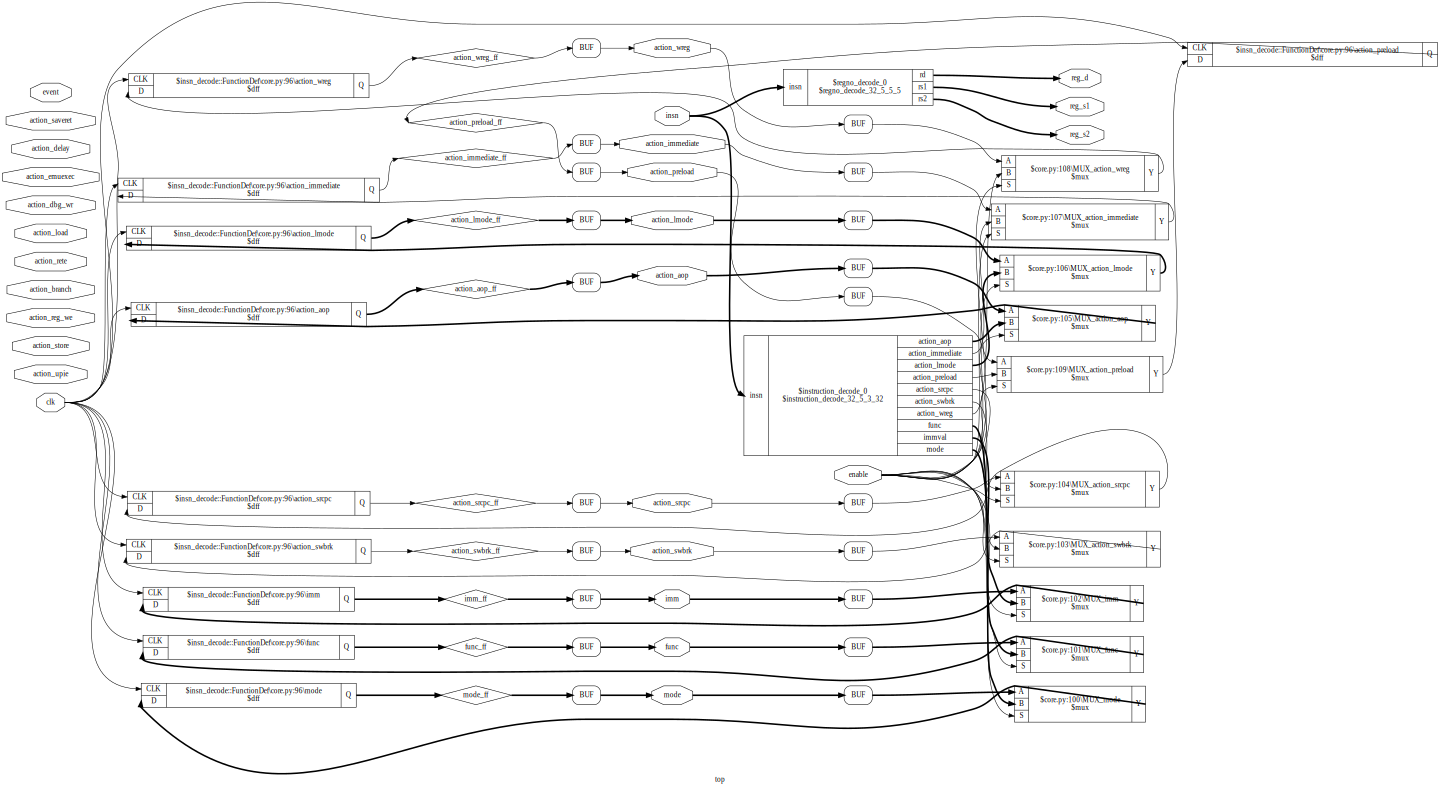

In [4]:
from ys_aux import to_svg
design.finalize("top")
display(to_svg(design, "top", 200))